# Deep Learning
> A catalogue of not so deep ideas in Deep Learning.
- toc: true 
- badges: true
- comments: true
- categories: [Research]


Deep Learning is a collection of techniques for finding functions that can approximate arbitrary input-output mappings, while capturing enough structure of the problem to be able to use them in practical applicatons.language-translation systems,Image classification,Movie Recommendation systems are Some notable applications where they have become defacto-choice. This is by no means an exhaustive treatment of the field. Here I provide concise summaries,followed by a simple implementation of some of the most interesting ideas in the field. I believe that many things in the field are unnecessarily complicated by lengthy treatment where a readable code and short explanation will suffice. 

`Note` : This is not intended to be the first introduction to deep learning. Here I wanted to succintly catalogue some the latest advancements in the field. But, respecting tradition the first module starts from the basics.

## The Basics

Many deep learning models follow a simple recipe:

    1. Gather the data.
    2. Define learnable parameters. And specify how they will interact with the data.(architecture)
    3. Define a loss function to minimize.
    4. Adjust the parameters until satisfied.

### Train a linear regression model using gradient-descent.

Here we will see how we can perform all the above steps starting with the most barebones implementation. Note that the procedure outlined here is general purpose - meaning the way we adjust `parameters` is going to remain same irrecpective of the modality of the data, details of the loss function or the architecture.

Step 1. Gather the data

Let's generate some fake data.Let's assume that the data is coming from $y = 2*x1 - 4.2*x2 + 1 + noise(measurement error)$. This can be more succintly represented in vector notation :
$$y = \begin{bmatrix} x1 \\ x2 \end{bmatrix} . \begin{bmatrix} 2 \\ -4.2 \end{bmatrix} + 1$$


    


In [189]:
import numpy as np
def get_data(*params,const=None,rows=1000):
    #number of features in the input
    dim = len(params)
    x = np.random.normal(0,0.3,(rows,dim))
    y = x@np.array([params]).T
    if const:
        y += np.array([const])
    return x,y

In [190]:
x,y = get_data(2,-4.2,const=1)

In [191]:
x.shape,y.shape

((1000, 2), (1000, 1))

Step 2. Define learnable parameters. And specify how they will interact with the data.(architecture)

Now we aim to learn the right coefficients to approximate the data generation process. First let's look at some code.

In [192]:
# Start with a random guess that respects the sanctity of the data.i.e our inputs are of dimension 1000*2 
# outputs are 1000*1. Multiplying inputs by a 2*1 matrix(weights) and adding a constant(bias) is the simplest way
# to ensure an output of 1000*1. 

# initial guess
init_weights = np.array([[0.,-1.]]) #shape -> 1*2
init_bias = np.array([0.])

#expected output
def give_expected_output(inpt,weights,bias):
    return ((inpt@weights.T) + bias)

In [193]:
out = give_expected_output(x,init_weights,init_bias)#shape -> 1000*1

In [194]:
def get_error(out,expected_out):
    return np.mean((expected_out - out)**2)

In [195]:
get_error(out,y) # IF WE CAN DRIVE THIS NUMBER DOWN TO ZERO VIA A GENERAL PURPOSE PROCESS,WE ARE GOOD TO GO

2.3825763471307235

In [196]:
def get_grads(weights,bias,x,y,loss_func='squared_loss'):
    if loss_func == 'squared_loss':
        weights_grad = 2*np.mean((x@weights.T + bias - y)*weights)
        bias_grad = 2*np.mean((x@weights.T + bias - y))
    else:
        print("Sorry I'm not yet scalable enough for arbitrary loss functions")
    return weights_grad,bias_grad
        


grad_init_weights,grad_bias = get_grads(init_weights,init_bias,x,y,loss_func = 'squared_loss')

In [197]:
def learn(x,y,init_weights,init_bias,loss_func,lr=0.001,epochs=5000):
    out = give_expected_output(x,init_weights,init_bias)
    error = loss_func(out,y)
    #print(f'initial error, epoch 0: {error}')
    errors = [error]
    pres_lr = lr
    for i in range(epochs):
        weight_grad,bias_grad = get_grads(init_weights,init_bias,x,y)
        init_weights -= weight_grad*pres_lr
        init_bias -= bias_grad*pres_lr
        out = give_expected_output(x,init_weights,init_bias)
        error = loss_func(out,y)
        if np.mean(weight_grad)<0.0001:
            pres_lr = pres_lr*2
        errors.append(error)
    return errors,init_weights,init_bias
        

In [198]:
errors,final_weights,final_bias = learn(x,y,init_weights,init_bias,get_error)

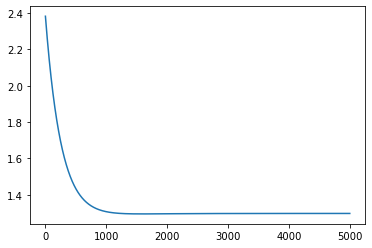

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(errors)

In [200]:
final_weights,final_bias

(array([[-0.89305539, -1.89305539]]), array([1.02516621]))

In [202]:
# In the above code what happens if 'lr' is not dynamically adjusted.

Now 

Here we know the parameters of the model `[2,-4.2]`. Our task is to learn them by just using input-output mappings `(x,y)`. Ideally we even don't have to extract the orginal parameters but only be able to reduce some predefined loss. But for now, let's just see if we could extract the orginal parameters using the data. 

In [2]:
# TODO: From scratch - implement backprop in numpy

In [15]:
# From scratch using pytorch

def model():
    pass

In [ ]:
# More about pytorch

In [14]:
# using pytorch to building more flexible architecure.

Some Good ideas to know

DropOut : While training some of the hidden layers can be randomly put to zero. This forces our network to learn more robust representations. Dropout can also break symmetry.

Break Symmetry : Initialize weights randomly to break symmetry.

Regularization methods: Weight Decay.

Read [Convolutions Arthmetic](https://arxiv.org/pdf/1603.07285.pdf)

In [ ]:
#